<a href="https://colab.research.google.com/github/DeeptiHari21/Coding_Project/blob/Master/Coding_Challenge_Example1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Load the data.
df = pd.read_csv("data.csv", sep=";")

In [3]:
# Get basic information about the data.
print("Dimension of datasets is: ", df.shape)
print(df.dtypes)

Dimension of datasets is:  (5777, 31)
PSEUDO_VIN            int64
TONDUR              float64
EngSpDist_K1        float64
EngSpDist_K2        float64
EngSpDist_K3        float64
EngSpDist_K4        float64
EngSpDist_K5        float64
EngSpDist_K6        float64
EngSpDist_K7        float64
EngSpDist_K8        float64
EngSpDist_K9        float64
EngSpDist_K10       float64
EngSpDist_K11       float64
EngSpDist_K12       float64
EngSpDist_K13       float64
EngSpDist_K14         int64
AmbTempDist_K1        int64
AmbTempDist_K2        int64
AmbTempDist_K3        int64
AmbTempDist_K4        int64
AmbTempDist_K5        int64
AmbTempDist_K6        int64
AmbTempDist_K7        int64
AmbTempDist_K8        int64
AmbTempDist_K9        int64
AmbTempDist_K10       int64
MILEAGE               int64
DIAGNOSIS_DATE       object
REPAIR_DATE          object
TACHOMETER_IN_KM    float64
LABEL                object
dtype: object


In [4]:
df.head()

,PSEUDO_VIN,TONDUR,EngSpDist_K1,EngSpDist_K2,EngSpDist_K3,EngSpDist_K4,EngSpDist_K5,EngSpDist_K6,EngSpDist_K7,EngSpDist_K8,...,AmbTempDist_K6,AmbTempDist_K7,AmbTempDist_K8,AmbTempDist_K9,AmbTempDist_K10,MILEAGE,DIAGNOSIS_DATE,REPAIR_DATE,TACHOMETER_IN_KM,LABEL
0,5247,1249456.1,239471.8,443507.3,230166.7,18955.4,3453.7,1631.0,748.4,373.2,...,317,416,155,0,0,35008,03.06.14,NaN,NaN,NO_DAMAGE
1,5405,2221482.5,868673.2,862615.7,154180.3,12707.2,2885.7,951.6,466.9,255.2,...,478,479,167,1,0,14959,10.08.15,NaN,NaN,NO_DAMAGE
2,1642,3433681.7,822744.4,1954545.1,366699.7,26077.9,1452.6,238.2,91.5,47.4,...,676,993,261,2,0,37685,30.01.15,NaN,NaN,NO_DAMAGE
3,4784,615134.7,138935.2,209138.3,106259.6,10133.9,1111.9,230.7,81.5,49.9,...,169,295,112,2,0,7054,02.04.15,NaN,NaN,NO_DAMAGE
4,3656,2141362.5,797644.6,729555.5,242742.9,13288.6,2374.5,815.7,341.1,175.1,...,358,750,229,2,1,19680,23.11.15,NaN,NaN,NO_DAMAGE


# Exploratory Data Anlysis

LABEL
NO_DAMAGE    5441
DAMAGE        336
dtype: int64


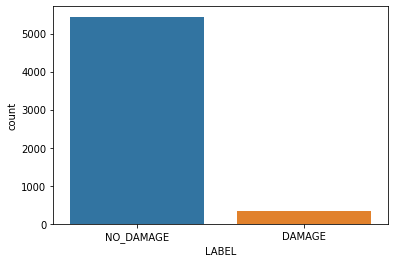

In [5]:
# Check how many damaged and unamaged vehicles are there..
print(df.value_counts("LABEL"))

# Visualize the count.
sns.countplot(data=df, x="LABEL", label="Count")

Visualize the valrious features' relationship with the LABEL column in histograms. To do so, split the features into categories for simplicity.

In [6]:
# Split sminilar features into groups

Misc_Features = ["TONDUR", "MILEAGE", "TACHOMETER_IN_KM"]
Engine_Speed = ["EngSpDist_K1", "EngSpDist_K2", "EngSpDist_K3", "EngSpDist_K4", "EngSpDist_K5", "EngSpDist_K6", "EngSpDist_K7", 
                "EngSpDist_K8", "EngSpDist_K9", "EngSpDist_K10", "EngSpDist_K11", "EngSpDist_K12", "EngSpDist_K13", "EngSpDist_K14"]
District_Temp = ["AmbTempDist_K1", "AmbTempDist_K2", "AmbTempDist_K3", "AmbTempDist_K4", "AmbTempDist_K5", 
                        "AmbTempDist_K6", "AmbTempDist_K7", "AmbTempDist_K8", "AmbTempDist_K9", "AmbTempDist_K10"]

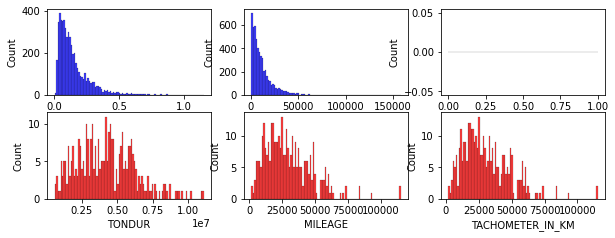

In [7]:
# Plot histograms of the first category of features

fig, axs = plt.subplots(2, 3, figsize=(10,3.5))
sns.histplot(df[df["LABEL"]=="NO_DAMAGE"][Misc_Features[0]], bins=100, color="blue", label="NO_DAMAGE", ax=axs[0,0])
sns.histplot(df[df["LABEL"]=="DAMAGE"][Misc_Features[0]], bins=100, color="red", label="DAMAGE", ax=axs[1,0])
sns.histplot(df[df["LABEL"]=="NO_DAMAGE"][Misc_Features[1]], bins=100, color="blue", label="NO_DAMAGE", ax=axs[0,1])
sns.histplot(df[df["LABEL"]=="DAMAGE"][Misc_Features[1]], bins=100, color="red", label="DAMAGE", ax=axs[1,1])
sns.histplot(df[df["LABEL"]=="NO_DAMAGE"][Misc_Features[2]], bins=100, color="blue", label="NO_DAMAGE", ax=axs[0,2])
sns.histplot(df[df["LABEL"]=="DAMAGE"][Misc_Features[2]], bins=100, color="red", label="DAMAGE", ax=axs[1,2])

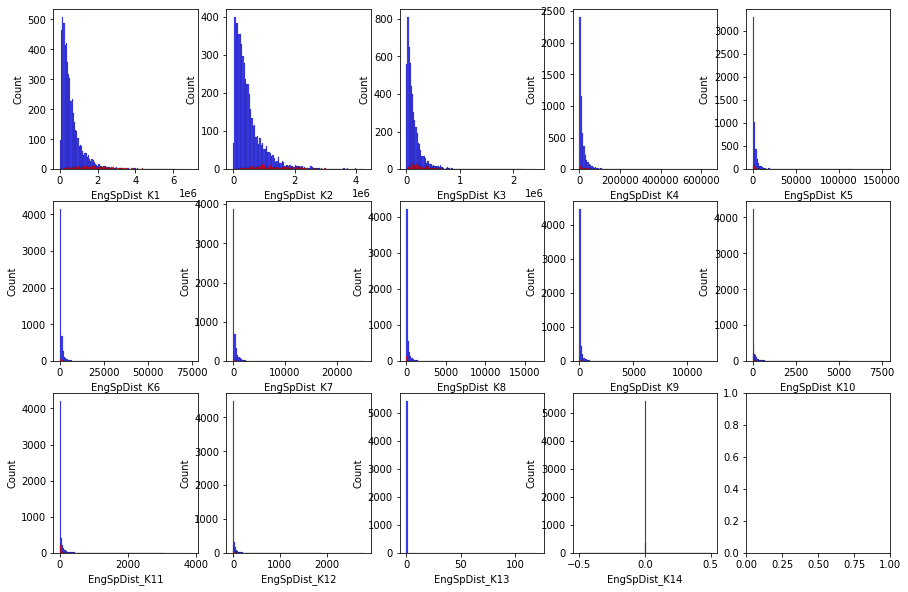

In [8]:
# Plot histograms for the second set of features, gives information about the idling time in different districts.

fig, axs = plt.subplots(3, 5, figsize=(15,10))
sns.histplot(df[df["LABEL"]=="NO_DAMAGE"][Engine_Speed[0]], bins=100, color="blue", label="NO_DAMAGE", ax=axs[0,0])
sns.histplot(df[df["LABEL"]=="DAMAGE"][Engine_Speed[0]], bins=100, color="red", label="DAMAGE", ax=axs[0,0])
sns.histplot(df[df["LABEL"]=="NO_DAMAGE"][Engine_Speed[1]], bins=100, color="blue", label="NO_DAMAGE", ax=axs[0,1])
sns.histplot(df[df["LABEL"]=="DAMAGE"][Engine_Speed[1]], bins=100, color="red", label="DAMAGE", ax=axs[0,1])
sns.histplot(df[df["LABEL"]=="NO_DAMAGE"][Engine_Speed[2]], bins=100, color="blue", label="NO_DAMAGE", ax=axs[0,2])
sns.histplot(df[df["LABEL"]=="DAMAGE"][Engine_Speed[2]], bins=100, color="red", label="DAMAGE", ax=axs[0,2])
sns.histplot(df[df["LABEL"]=="NO_DAMAGE"][Engine_Speed[3]], bins=100, color="blue", label="NO_DAMAGE", ax=axs[0,3])
sns.histplot(df[df["LABEL"]=="DAMAGE"][Engine_Speed[3]], bins=100, color="red", label="DAMAGE", ax=axs[0,3])
sns.histplot(df[df["LABEL"]=="NO_DAMAGE"][Engine_Speed[4]], bins=100, color="blue", label="NO_DAMAGE", ax=axs[0,4])
sns.histplot(df[df["LABEL"]=="DAMAGE"][Engine_Speed[4]], bins=100, color="red", label="DAMAGE", ax=axs[0,4])
sns.histplot(df[df["LABEL"]=="NO_DAMAGE"][Engine_Speed[5]], bins=100, color="blue", label="NO_DAMAGE", ax=axs[1,0])
sns.histplot(df[df["LABEL"]=="DAMAGE"][Engine_Speed[5]], bins=100, color="red", label="DAMAGE", ax=axs[1,0])
sns.histplot(df[df["LABEL"]=="NO_DAMAGE"][Engine_Speed[6]], bins=100, color="blue", label="NO_DAMAGE", ax=axs[1,1])
sns.histplot(df[df["LABEL"]=="DAMAGE"][Engine_Speed[6]], bins=100, color="red", label="DAMAGE", ax=axs[1,1])
sns.histplot(df[df["LABEL"]=="NO_DAMAGE"][Engine_Speed[7]], bins=100, color="blue", label="NO_DAMAGE", ax=axs[1,2])
sns.histplot(df[df["LABEL"]=="DAMAGE"][Engine_Speed[7]], bins=100, color="red", label="DAMAGE", ax=axs[1,2])
sns.histplot(df[df["LABEL"]=="NO_DAMAGE"][Engine_Speed[8]], bins=100, color="blue", label="NO_DAMAGE", ax=axs[1,3])
sns.histplot(df[df["LABEL"]=="DAMAGE"][Engine_Speed[8]], bins=100, color="red", label="DAMAGE", ax=axs[1,3])
sns.histplot(df[df["LABEL"]=="NO_DAMAGE"][Engine_Speed[9]], bins=100, color="blue", label="NO_DAMAGE", ax=axs[1,4])
sns.histplot(df[df["LABEL"]=="DAMAGE"][Engine_Speed[9]], bins=100, color="red", label="DAMAGE", ax=axs[1,4])
sns.histplot(df[df["LABEL"]=="NO_DAMAGE"][Engine_Speed[10]], bins=100, color="blue", label="NO_DAMAGE", ax=axs[2,0])
sns.histplot(df[df["LABEL"]=="DAMAGE"][Engine_Speed[10]], bins=100, color="red", label="DAMAGE", ax=axs[2,0])
sns.histplot(df[df["LABEL"]=="NO_DAMAGE"][Engine_Speed[11]], bins=100, color="blue", label="NO_DAMAGE", ax=axs[2,1])
sns.histplot(df[df["LABEL"]=="DAMAGE"][Engine_Speed[11]], bins=100, color="red", label="DAMAGE", ax=axs[2,1])
sns.histplot(df[df["LABEL"]=="NO_DAMAGE"][Engine_Speed[12]], bins=100, color="blue", label="NO_DAMAGE", ax=axs[2,2])
sns.histplot(df[df["LABEL"]=="DAMAGE"][Engine_Speed[12]], bins=100, color="red", label="DAMAGE", ax=axs[2,2])
sns.histplot(df[df["LABEL"]=="NO_DAMAGE"][Engine_Speed[13]], bins=100, color="blue", label="NO_DAMAGE", ax=axs[2,3])
sns.histplot(df[df["LABEL"]=="DAMAGE"][Engine_Speed[13]], bins=100, color="red", label="DAMAGE", ax=axs[2,3])

Consider only the first four columns, i.e., EngSpDist_K1, EngSpDist_K2, EngSpDist_K3, EngSpDist_K4 for further analysis since the range of values is more. The others have a very narrow range and wouldn't contribute much to the predictions.

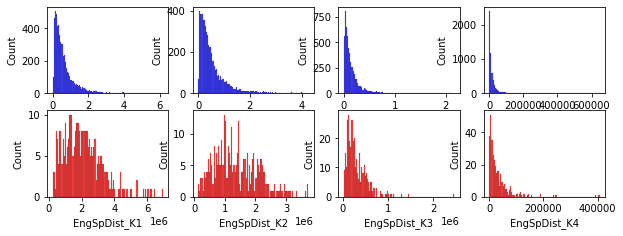

In [9]:
# Plot histograms for the second set of features, gives information about the idling time in different districts.

fig, axs = plt.subplots(2, 4, figsize=(10,3.5))
sns.histplot(df[df["LABEL"]=="NO_DAMAGE"][Engine_Speed[0]], bins=100, color="blue", label="NO_DAMAGE", ax=axs[0,0])
sns.histplot(df[df["LABEL"]=="DAMAGE"][Engine_Speed[0]], bins=100, color="red", label="DAMAGE", ax=axs[1,0])
sns.histplot(df[df["LABEL"]=="NO_DAMAGE"][Engine_Speed[1]], bins=100, color="blue", label="NO_DAMAGE", ax=axs[0,1])
sns.histplot(df[df["LABEL"]=="DAMAGE"][Engine_Speed[1]], bins=100, color="red", label="DAMAGE", ax=axs[1,1])
sns.histplot(df[df["LABEL"]=="NO_DAMAGE"][Engine_Speed[2]], bins=100, color="blue", label="NO_DAMAGE", ax=axs[0,2])
sns.histplot(df[df["LABEL"]=="DAMAGE"][Engine_Speed[2]], bins=100, color="red", label="DAMAGE", ax=axs[1,2])
sns.histplot(df[df["LABEL"]=="NO_DAMAGE"][Engine_Speed[3]], bins=100, color="blue", label="NO_DAMAGE", ax=axs[0,3])
sns.histplot(df[df["LABEL"]=="DAMAGE"][Engine_Speed[3]], bins=100, color="red", label="DAMAGE", ax=axs[1,3])

In [10]:
# Drop the unwanted columns.
df.drop(labels=["EngSpDist_K5", "EngSpDist_K6", "EngSpDist_K7", "EngSpDist_K8", "EngSpDist_K9", 
       "EngSpDist_K10", "EngSpDist_K11", "EngSpDist_K12", "EngSpDist_K13", "EngSpDist_K14"], axis=1, inplace=True)

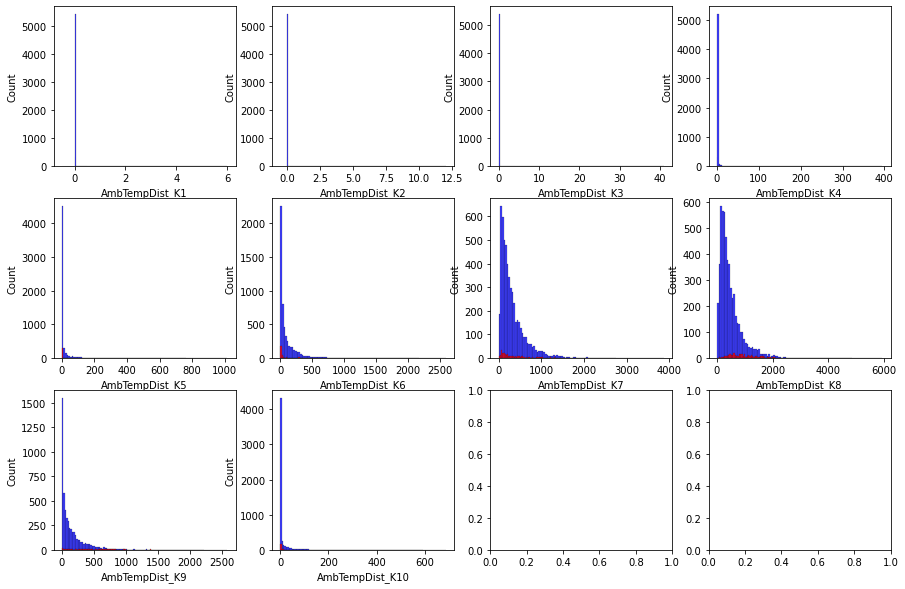

In [11]:
# Plot histograms for the third set of features, gives information about the time spent in different temperatures.

fig, axs = plt.subplots(3, 4, figsize=(15,10))
sns.histplot(df[df["LABEL"]=="NO_DAMAGE"][District_Temp[0]], bins=100, color="blue", label="NO_DAMAGE", ax=axs[0,0])
sns.histplot(df[df["LABEL"]=="DAMAGE"][District_Temp[0]], bins=100, color="red", label="DAMAGE", ax=axs[0,0])
sns.histplot(df[df["LABEL"]=="NO_DAMAGE"][District_Temp[1]], bins=100, color="blue", label="NO_DAMAGE", ax=axs[0,1])
sns.histplot(df[df["LABEL"]=="DAMAGE"][District_Temp[1]], bins=100, color="red", label="DAMAGE", ax=axs[0,1])
sns.histplot(df[df["LABEL"]=="NO_DAMAGE"][District_Temp[2]], bins=100, color="blue", label="NO_DAMAGE", ax=axs[0,2])
sns.histplot(df[df["LABEL"]=="DAMAGE"][District_Temp[2]], bins=100, color="red", label="DAMAGE", ax=axs[0,2])
sns.histplot(df[df["LABEL"]=="NO_DAMAGE"][District_Temp[3]], bins=100, color="blue", label="NO_DAMAGE", ax=axs[0,3])
sns.histplot(df[df["LABEL"]=="DAMAGE"][District_Temp[3]], bins=100, color="red", label="DAMAGE", ax=axs[0,3])
sns.histplot(df[df["LABEL"]=="NO_DAMAGE"][District_Temp[4]], bins=100, color="blue", label="NO_DAMAGE", ax=axs[1,0])
sns.histplot(df[df["LABEL"]=="DAMAGE"][District_Temp[4]], bins=100, color="red", label="DAMAGE", ax=axs[1,0])
sns.histplot(df[df["LABEL"]=="NO_DAMAGE"][District_Temp[5]], bins=100, color="blue", label="NO_DAMAGE", ax=axs[1,1])
sns.histplot(df[df["LABEL"]=="DAMAGE"][District_Temp[5]], bins=100, color="red", label="DAMAGE", ax=axs[1,1])
sns.histplot(df[df["LABEL"]=="NO_DAMAGE"][District_Temp[6]], bins=100, color="blue", label="NO_DAMAGE", ax=axs[1,2])
sns.histplot(df[df["LABEL"]=="DAMAGE"][District_Temp[6]], bins=100, color="red", label="DAMAGE", ax=axs[1,2])
sns.histplot(df[df["LABEL"]=="NO_DAMAGE"][District_Temp[7]], bins=100, color="blue", label="NO_DAMAGE", ax=axs[1,3])
sns.histplot(df[df["LABEL"]=="DAMAGE"][District_Temp[7]], bins=100, color="red", label="DAMAGE", ax=axs[1,3])
sns.histplot(df[df["LABEL"]=="NO_DAMAGE"][District_Temp[8]], bins=100, color="blue", label="NO_DAMAGE", ax=axs[2,0])
sns.histplot(df[df["LABEL"]=="DAMAGE"][District_Temp[8]], bins=100, color="red", label="DAMAGE", ax=axs[2,0])
sns.histplot(df[df["LABEL"]=="NO_DAMAGE"][District_Temp[9]], bins=100, color="blue", label="NO_DAMAGE", ax=axs[2,1])
sns.histplot(df[df["LABEL"]=="DAMAGE"][District_Temp[9]], bins=100, color="red", label="DAMAGE", ax=axs[2,1])

Here also further consider only the four columns, i.e., AmbTempDist_K6, AmbTempDist_K7, AmbTempDist_K8, AmbTempDist_K9 for further analysis since the range of values is more. The others have a very narrow range to give a good picture.

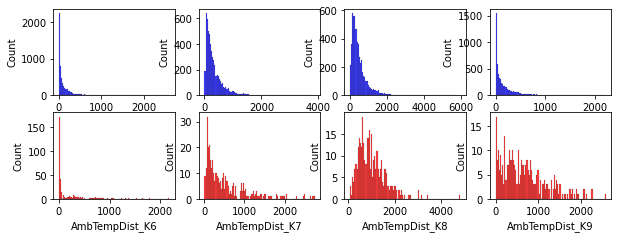

In [12]:
# Plot histograms for the third set of features, gives information about the time spent in different temperatures.

fig, axs = plt.subplots(2, 4, figsize=(10,3.5))
sns.histplot(df[df["LABEL"]=="NO_DAMAGE"][District_Temp[5]], bins=100, color="blue", label="NO_DAMAGE", ax=axs[0,0])
sns.histplot(df[df["LABEL"]=="DAMAGE"][District_Temp[5]], bins=100, color="red", label="DAMAGE", ax=axs[1,0])
sns.histplot(df[df["LABEL"]=="NO_DAMAGE"][District_Temp[6]], bins=100, color="blue", label="NO_DAMAGE", ax=axs[0,1])
sns.histplot(df[df["LABEL"]=="DAMAGE"][District_Temp[6]], bins=100, color="red", label="DAMAGE", ax=axs[1,1])
sns.histplot(df[df["LABEL"]=="NO_DAMAGE"][District_Temp[7]], bins=100, color="blue", label="NO_DAMAGE", ax=axs[0,2])
sns.histplot(df[df["LABEL"]=="DAMAGE"][District_Temp[7]], bins=100, color="red", label="DAMAGE", ax=axs[1,2])
sns.histplot(df[df["LABEL"]=="NO_DAMAGE"][District_Temp[8]], bins=100, color="blue", label="NO_DAMAGE", ax=axs[0,3])
sns.histplot(df[df["LABEL"]=="DAMAGE"][District_Temp[8]], bins=100, color="red", label="DAMAGE", ax=axs[1,3])

In [13]:
# Drop unwanted columns.
df.drop(labels=["AmbTempDist_K1", "AmbTempDist_K2", "AmbTempDist_K3", "AmbTempDist_K4", "AmbTempDist_K5", "AmbTempDist_K10"], axis=1, inplace=True)

Also exclude the DIAGNOSIS_DATE, REPAIR_DATE and PSEUDO_VIN since they cannot help much in predicting damages. (Wanted to see the dates when most repairs were noted using SQL, but couldn't import SQL. Can be done using Python itself, but I assume the adtes are evenly distributed and moved on.)

In [14]:
df.drop(labels=["PSEUDO_VIN", "DIAGNOSIS_DATE", "REPAIR_DATE"], axis=1, inplace=True)

In [15]:
df.dtypes

TONDUR              float64
EngSpDist_K1        float64
EngSpDist_K2        float64
EngSpDist_K3        float64
EngSpDist_K4        float64
AmbTempDist_K6        int64
AmbTempDist_K7        int64
AmbTempDist_K8        int64
AmbTempDist_K9        int64
MILEAGE               int64
TACHOMETER_IN_KM    float64
LABEL                object
dtype: object

In [16]:
df.describe()

,TONDUR,EngSpDist_K1,EngSpDist_K2,EngSpDist_K3,EngSpDist_K4,AmbTempDist_K6,AmbTempDist_K7,AmbTempDist_K8,AmbTempDist_K9,MILEAGE,TACHOMETER_IN_KM
count,5.777000e+03,5.777000e+03,5.777000e+03,5.777000e+03,5777.000000,5777.000000,5777.000000,5777.000000,5777.000000,5777.000000,336.000000
mean,1.638604e+06,6.949810e+05,5.659570e+05,1.523329e+05,17916.948520,107.391726,331.057989,507.202527,194.065605,13322.323524,30366.226190
std,1.478634e+06,7.280069e+05,5.510523e+05,1.698033e+05,31982.030334,182.867761,330.765296,447.363231,282.863019,13254.917856,17811.425833
min,1.692310e+04,4.641300e+03,4.066000e+02,3.030000e+01,10.400000,0.000000,0.000000,0.000000,0.000000,1002.000000,1873.000000
25%,6.443811e+05,2.352837e+05,1.947698e+05,4.601980e+04,3302.400000,10.000000,113.000000,206.000000,19.000000,4485.000000,17586.250000
50%,1.167932e+06,4.634370e+05,3.886051e+05,9.958480e+04,8232.300000,36.000000,226.000000,376.000000,87.000000,9330.000000,26821.000000
75%,2.111713e+06,8.623770e+05,7.292884e+05,1.953351e+05,19650.900000,128.000000,433.000000,652.000000,250.000000,17187.000000,40978.000000
max,1.151146e+07,6.959281e+06,4.262310e+06,2.453757e+06,646982.900000,2592.000000,3874.000000,5947.000000,2579.000000,157940.000000,115314.000000


In [17]:
df.head()

,TONDUR,EngSpDist_K1,EngSpDist_K2,EngSpDist_K3,EngSpDist_K4,AmbTempDist_K6,AmbTempDist_K7,AmbTempDist_K8,AmbTempDist_K9,MILEAGE,TACHOMETER_IN_KM,LABEL
0,1249456.1,239471.8,443507.3,230166.7,18955.4,317,416,155,0,35008,NaN,NO_DAMAGE
1,2221482.5,868673.2,862615.7,154180.3,12707.2,478,479,167,1,14959,NaN,NO_DAMAGE
2,3433681.7,822744.4,1954545.1,366699.7,26077.9,676,993,261,2,37685,NaN,NO_DAMAGE
3,615134.7,138935.2,209138.3,106259.6,10133.9,169,295,112,2,7054,NaN,NO_DAMAGE
4,2141362.5,797644.6,729555.5,242742.9,13288.6,358,750,229,2,19680,NaN,NO_DAMAGE


In [18]:
df.to_csv("modified_data.csv")

In [19]:
mod_df = pd.read_csv("modified_data.csv")

# Model Selection

In [20]:
# Replace the LABEL data with binary numbers.
mod_df["LABEL"].replace("NO_DAMAGE", 0, inplace=True)
mod_df["LABEL"].replace("DAMAGE", 1, inplace=True)

In [21]:
# Divide the dataset into the independant and dependant variables.

features = ["TONDUR", "EngSpDist_K1", "EngSpDist_K2", "EngSpDist_K3", "EngSpDist_K4", 
            "AmbTempDist_K6", "AmbTempDist_K7", "AmbTempDist_K8", "AmbTempDist_K9", "MILEAGE"]
x = mod_df[features]
y = mod_df["LABEL"]

In [22]:
# Split the data into training and testing sets.
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=0)

It is a binary classification model, so I use logistic regression first. Support vector machine (SVM) can also be used in addition to some other models such as decision trees.


## Logistic Regression

Logistic regression uses the sigmoid function of the form:
$$ f(x) = \frac{1}{1-e^{-(\vec{w}\cdot\vec{x}+b)}} $$
where $w$ are the various features, and $b$ is the intercept.

### Model building

In [23]:
# Make a pipeline for preprocessing and use logistic regression.
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler # scales the data such that it has 0 mean and 1 variance
from sklearn.linear_model import LogisticRegression

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(xtrain, ytrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [24]:
# Check the accuracy score on the test set.
print("The accuracy score is: ", pipe.score(xtest, ytest))

The accuracy score is:  0.9486735870818915


In [25]:
# Make prediction.
ypred_lr = pipe.predict(xtest)
ypred_lr

array([0, 1, 0, ..., 0, 0, 0])

In [26]:
# Calculate the probability of getting damage/no-damage.
yprob_lr = pipe.predict_proba(xtest)
yprob_lr

array([[0.98290833, 0.01709167],
       [0.45692053, 0.54307947],
       [0.99059733, 0.00940267],
       ...,
       [0.98936491, 0.01063509],
       [0.75815575, 0.24184425],
       [0.98378649, 0.01621351]])

### Model evaluation

In [27]:
# Measure accuracy of model.

from sklearn.metrics import jaccard_score
print("The jaccard index for logistic regression is: ", jaccard_score(ytest, ypred_lr, pos_label=0))

from sklearn.metrics import f1_score
print("The f1 score for logistic regression is: ", f1_score(ytest, ypred_lr, average='weighted') )

The jaccard index for logistic regression is:  0.9474926253687316
The f1 score for logistic regression is:  0.9418164035664521


In [28]:
# Use the confusion matrix for evaluation.
from sklearn import metrics

conf_mat_lr = metrics.confusion_matrix(ytest, ypred_lr)
conf_mat_lr

array([[1606,   21],
       [  68,   39]])

Number of misclassified vehicles are 68 + 21 = 89. 

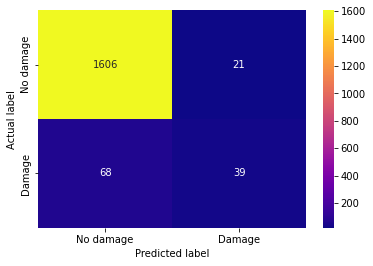

In [29]:
# Visualize the confusion matrix using a heatmap.

names = ["No damage", "Damage"]
ticks = [0.5,1.5]
sns.heatmap(pd.DataFrame(conf_mat_lr), annot=True, cmap = 'plasma', fmt='g')
plt.xticks(ticks, names)
plt.yticks(ticks, names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [30]:
# Measure accuracy of the metric.

print("Accuracy:",metrics.accuracy_score(ytest, ypred_lr))
print("Precision:",metrics.precision_score(ytest, ypred_lr))

Accuracy: 0.9486735870818915
Precision: 0.65


## Support Vector Machine

SVC maps the data to a higher dimentional space for better classification.

### Model building

In [31]:
# Import and implement the SVM function from sklearn.
from sklearn import svm

func = svm.SVC()
func.fit(xtrain, ytrain) 

SVC()

In [32]:
print("The accuracy score is: ", func.score(xtest,ytest))

The accuracy score is:  0.9382929642445214


In [33]:
ypred_svm = func.predict(xtest)
ypred_svm

array([0, 0, 0, ..., 0, 0, 0])

### Model evaluation

In [34]:
# Meaure accuracy of the model.

from sklearn.metrics import jaccard_score
print("The jaccard index for SVM is: ", jaccard_score(ytest, ypred_svm, pos_label=0))

from sklearn.metrics import f1_score
print("The f1 score for SVM is: ", f1_score(ytest, ypred_svm, average='weighted') )

The jaccard index for SVM is:  0.9379350348027842
The f1 score for SVM is:  0.9179605187229115


In [35]:
# Use the confusion matrix for evaluation.
from sklearn import metrics

conf_mat_svm = metrics.confusion_matrix(ytest, ypred_svm)
conf_mat_svm

array([[1617,   10],
       [  97,   10]])

Number of misclassified vehicles are 10 + 97 = 107.

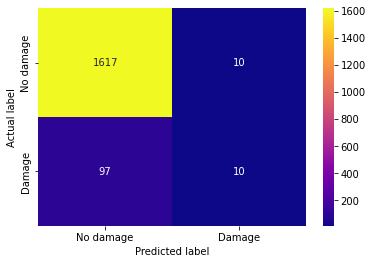

In [36]:
# Visualize the confusion matrix using a heatmap.

names = ["No damage", "Damage"]
ticks = [0.5,1.5]
sns.heatmap(pd.DataFrame(conf_mat_svm), annot=True, cmap = 'plasma', fmt='g')
plt.xticks(ticks, names)
plt.yticks(ticks, names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [37]:
# Measure accuracy of the metric.

print("Accuracy:",metrics.accuracy_score(ytest, ypred_svm))
print("Precision:",metrics.precision_score(ytest, ypred_svm))

Accuracy: 0.9382929642445214
Precision: 0.5


# Decision Tree Classifier

We build the model based on probabilities in the form of a tree.

### Model building

In [38]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

t = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
t.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [39]:
print("The accuracy score is: ", t.score(xtest,ytest))

The accuracy score is:  0.9452133794694348


In [40]:
ypred_dtc = t.predict(xtest)
ypred_dtc

array([0, 1, 0, ..., 0, 0, 0])

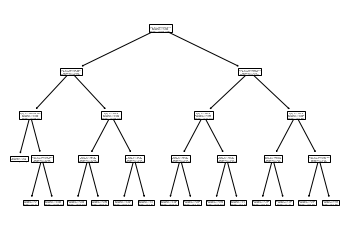

In [41]:
# Visualize the tree
tree.plot_tree(t)
plt.show()

### Model evaluation

In [42]:
# Meaure accuracy of the model.

from sklearn.metrics import jaccard_score
print("The jaccard index for decision tree classifier is: ", jaccard_score(ytest, ypred_dtc, pos_label=0))

from sklearn.metrics import f1_score
print("The f1 score for decision tree classifier is: ", f1_score(ytest, ypred_dtc, average='weighted') )

The jaccard index for decision tree classifier is:  0.9441176470588235
The f1 score for decision tree classifier is:  0.937065177129553


In [43]:
# Use the confusion matrix for evaluation.
from sklearn import metrics

conf_mat_dtc = metrics.confusion_matrix(ytest, ypred_dtc)
conf_mat_dtc

array([[1605,   22],
       [  73,   34]])

Number of misclassified vehicles are 73 + 22 = 95.

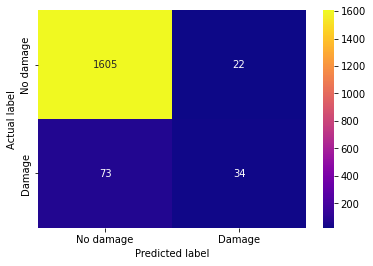

In [44]:
# Visualize the confusion matrix using a heatmap.

names = ["No damage", "Damage"]
ticks = [0.5,1.5]
sns.heatmap(pd.DataFrame(conf_mat_dtc), annot=True, cmap = 'plasma', fmt='g')
plt.xticks(ticks, names)
plt.yticks(ticks, names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [45]:
# Measure accuracy of the metric.

print("Accuracy:",metrics.accuracy_score(ytest, ypred_dtc))
print("Precision:",metrics.precision_score(ytest, ypred_dtc))

Accuracy: 0.9452133794694348
Precision: 0.6071428571428571




---



---

